# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import *

# EDA

In [2]:
insurance = pd.read_csv('new_insurance_data.csv')

insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [4]:
insurance.shape

(1338, 13)

In [5]:
insurance.ndim

2

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


### Distribution of Data

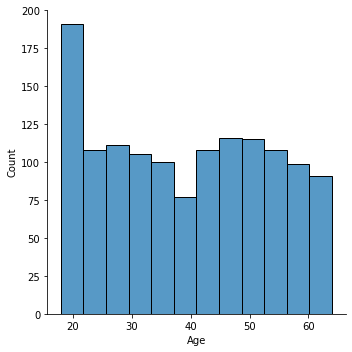

In [8]:
sns.displot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

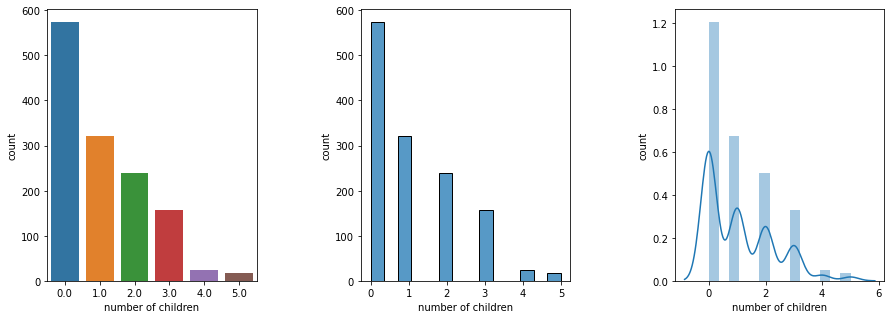

In [9]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('number of children')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('number of children')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('number of children')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Distribution of Claim Amount

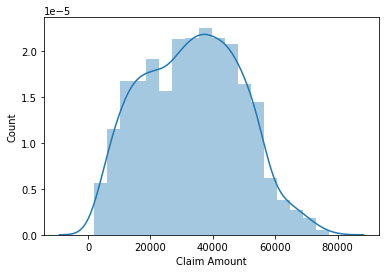

In [10]:
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

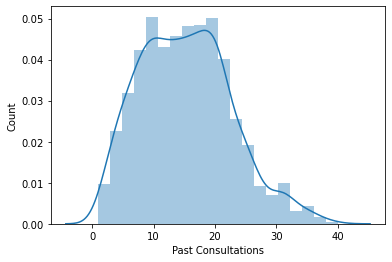

In [11]:
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consultations')
plt.ylabel('Count')
plt.show()

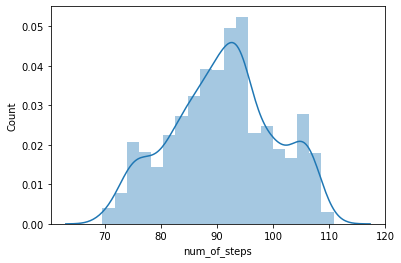

In [12]:
ins = insurance.copy()
ins['num_of_steps'] = ins['num_of_steps'].div(10000).round(2)

sns.distplot(x=ins['num_of_steps'])
plt.xlabel('num_of_steps')
plt.ylabel('Count')
plt.show()

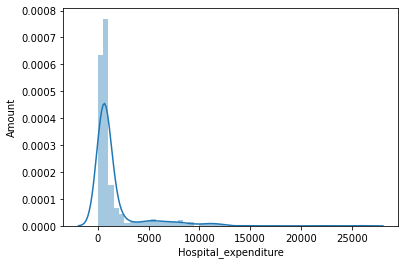

In [13]:
ins['Hospital_expenditure'] = ins['Hospital_expenditure'].div(10000).round(2)

sns.distplot(x=ins['Hospital_expenditure'])
plt.xlabel('Hospital_expenditure')
plt.ylabel('Amount')
plt.show()

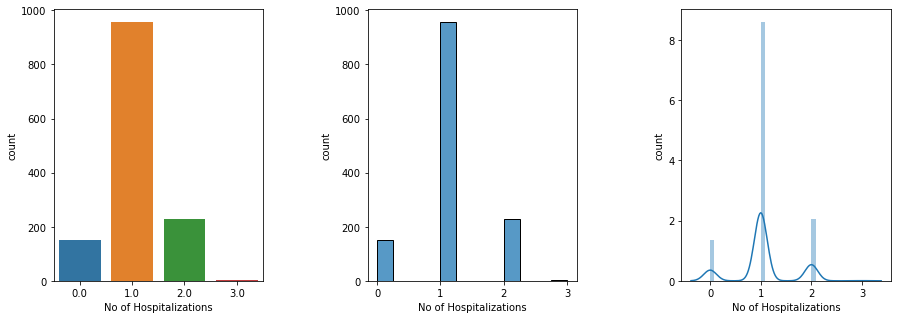

In [14]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x= insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of Hospitalizations')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x= insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of Hospitalizations')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x= insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('No of Hospitalizations')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [15]:
le = LabelEncoder()

insurance['smoker'] = le.fit_transform(insurance['smoker']) # categorical to numerical
insurance['smoker'] = insurance['smoker'].astype(int)

category_0 = le.classes_[0]
print('This is encoded is 0:',category_0)
category_1 = le.classes_[1]
print('This is encoded is 1:',category_1)

This is encoded is 0: no
This is encoded is 1: yes


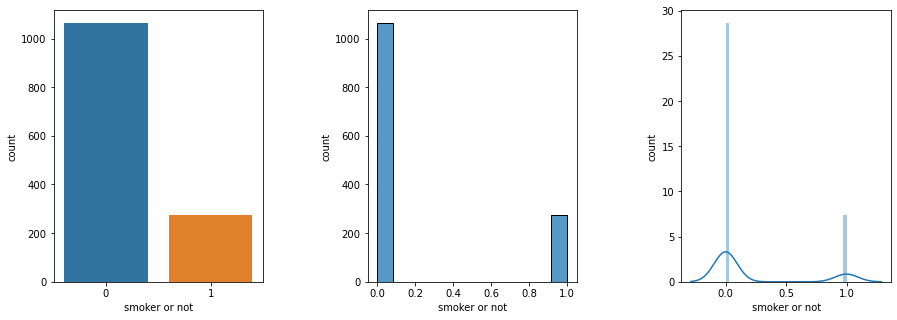

In [16]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x= insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x= insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x= insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [17]:
insurance['sex'] = le.fit_transform(insurance['sex']) # categorical to numerical
insurance['sex'] = insurance['sex'].astype(int)

category_0 = le.classes_[0]
print('This is encoded is 0:',category_0)
category_1 = le.classes_[1]
print('This is encoded is 1:',category_1)

This is encoded is 0: female
This is encoded is 1: male


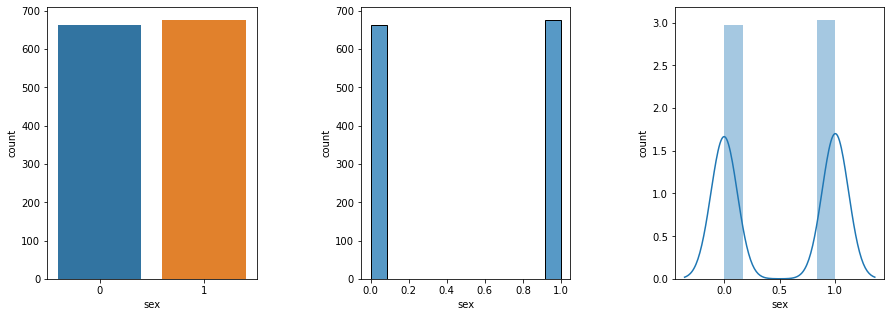

In [18]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x= insurance['sex'])
plt.xlabel('sex')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x= insurance['sex'])
plt.xlabel('sex')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x= insurance['sex'])
plt.xlabel('sex')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

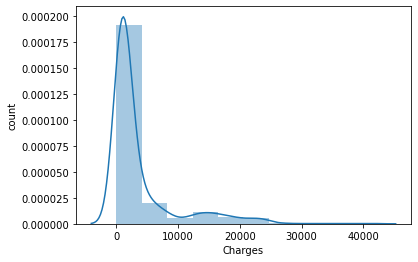

In [19]:
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Charges')
plt.ylabel('count')
plt.show()

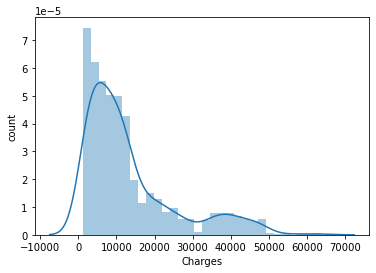

In [20]:
# Distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('count')
plt.show()

This is encoded is 0: northeast
This is encoded is 1: northwest
This is encoded is 2: southeast
This is encoded is 3: southwest


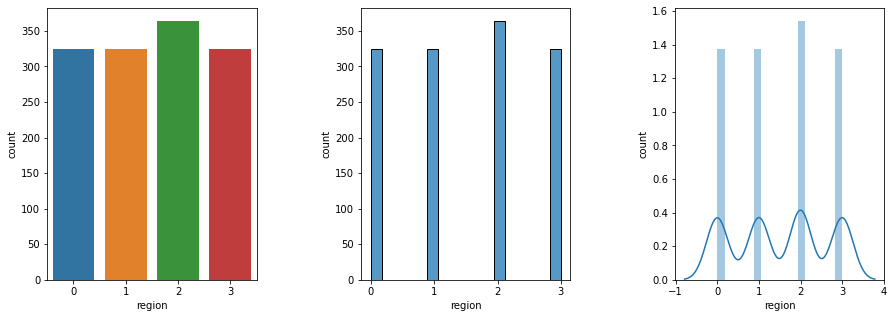

In [21]:
# Distribution of regions column
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

category_0 = le.classes_[0]
print('This is encoded is 0:',category_0)
category_1 = le.classes_[1]
print('This is encoded is 1:',category_1)
category_2 = le.classes_[2]
print('This is encoded is 2:',category_2)
category_3 = le.classes_[3]
print('This is encoded is 3:',category_3)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x= insurance['region'])
plt.xlabel('region')
plt.ylabel('count')

plt.subplot(1,3,2)
sns.histplot(x= insurance['region'])
plt.xlabel('region')
plt.ylabel('count')

plt.subplot(1,3,3)
sns.distplot(x= insurance['region'])
plt.xlabel('region')
plt.ylabel('count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Outlier Detection

<AxesSubplot:xlabel='age'>

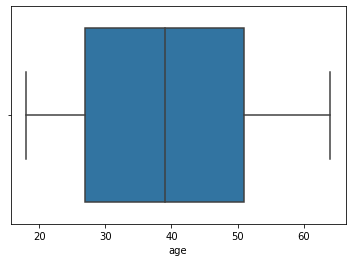

In [22]:
sns.boxplot(insurance['age'])

<AxesSubplot:xlabel='bmi'>

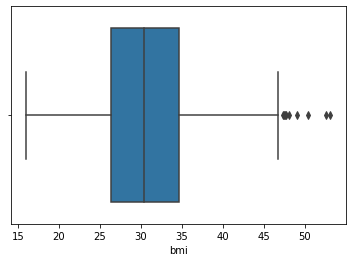

In [23]:
sns.boxplot(insurance['bmi'])

<AxesSubplot:xlabel='children'>

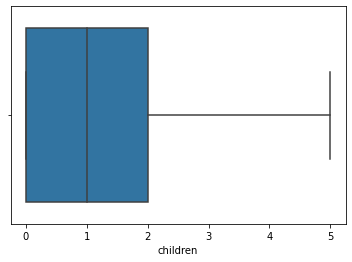

In [24]:
sns.boxplot(insurance['children'])

<AxesSubplot:xlabel='Claim_Amount'>

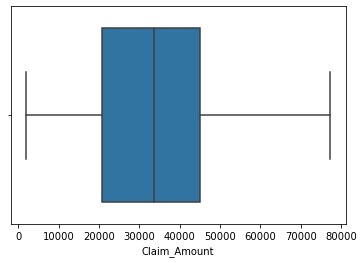

In [25]:
sns.boxplot(insurance['Claim_Amount'])

<AxesSubplot:xlabel='past_consultations'>

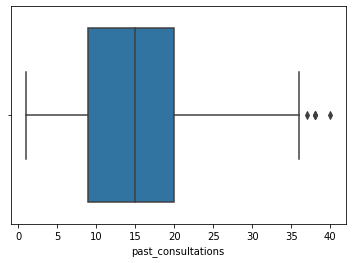

In [26]:
sns.boxplot(insurance['past_consultations'])

<AxesSubplot:xlabel='num_of_steps'>

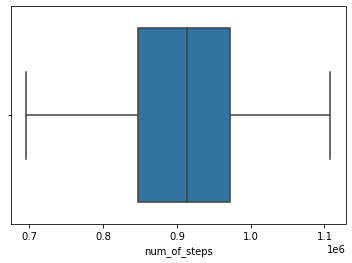

In [27]:
sns.boxplot(insurance['num_of_steps'])

<AxesSubplot:xlabel='Hospital_expenditure'>

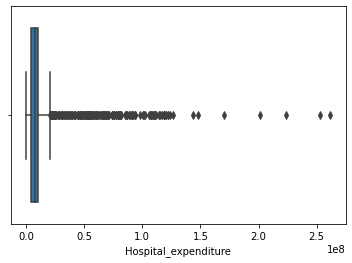

In [28]:
sns.boxplot(insurance['Hospital_expenditure'])

<AxesSubplot:xlabel='Anual_Salary'>

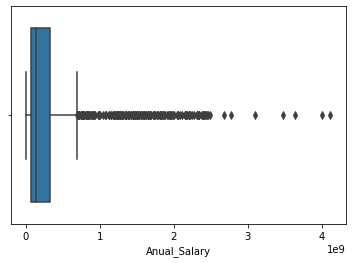

In [29]:
sns.boxplot(insurance['Anual_Salary'])

<AxesSubplot:xlabel='region'>

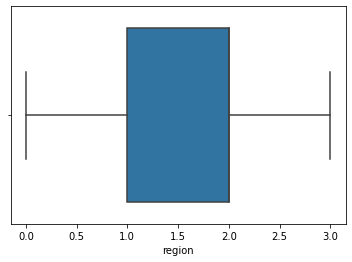

In [30]:
sns.boxplot(insurance['region'])

<AxesSubplot:xlabel='charges'>

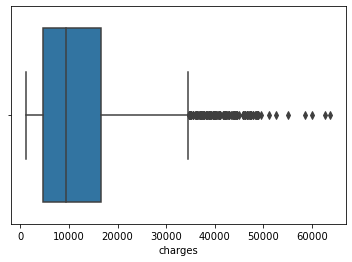

In [31]:
sns.boxplot(insurance['charges'])

<Figure size 720x360 with 0 Axes>

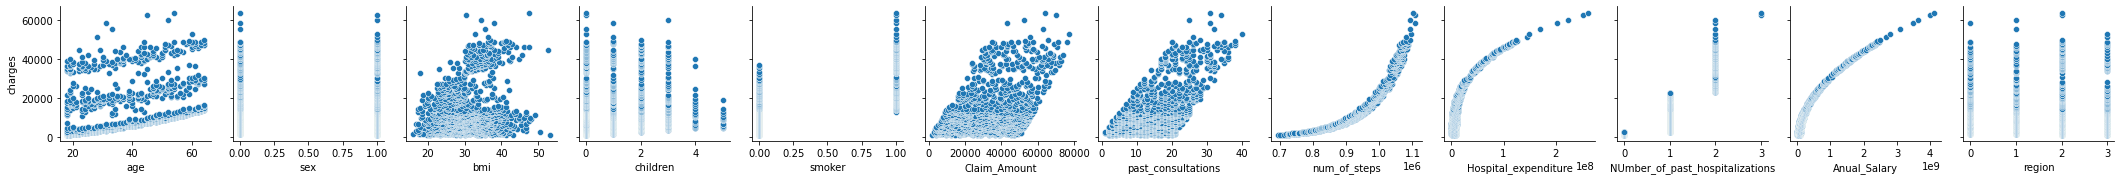

In [32]:
# Checking relationship between independent and dependent columns
plt.figure(figsize=(10,5))
sns.pairplot(data= insurance, y_vars=['charges'], x_vars=['age',
                                                          'sex',
                                                          'bmi', 
                                                          'children',
                                                          'smoker',
                                                          'Claim_Amount',
                                                          'past_consultations',
                                                          'num_of_steps',
                                                          'Hospital_expenditure',
                                                          'NUmber_of_past_hospitalizations',
                                                          'Anual_Salary',
                                                          'region'])

### Fixing Null Values


In [33]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [34]:
# When data is normally distributed then usually mean is preffered
# For categorical or skewed data, or if the data has a lot of outliers then median is preffered
insurance['age'] = insurance['age'].fillna(insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

### Feature Selection for Data Modelling

In [35]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019105,0.112161,0.041616,-0.028868,0.122828,0.168311,0.512985,0.137146,0.359434,0.163392,0.004659,0.293604
sex,-0.019105,1.000000,0.045170,0.018533,0.076185,-0.003884,0.050403,0.010342,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112161,0.045170,1.000000,0.007755,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.158261,0.198691
children,0.041616,0.018533,0.007755,1.000000,0.009608,0.041502,0.054832,0.163487,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028868,0.076185,0.003610,0.009608,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122828,-0.003884,0.093313,0.041502,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.009028,0.435635
past_consultations,0.168311,0.050403,0.130667,0.054832,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,-0.001866,0.627592
num_of_steps,0.512985,0.010342,0.135903,0.163487,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,-0.041920,0.889848
Hospital_expenditure,0.137146,0.069940,0.256892,0.025315,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359434,0.000214,0.137043,0.185546,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,-0.031450,0.820682


<AxesSubplot:>

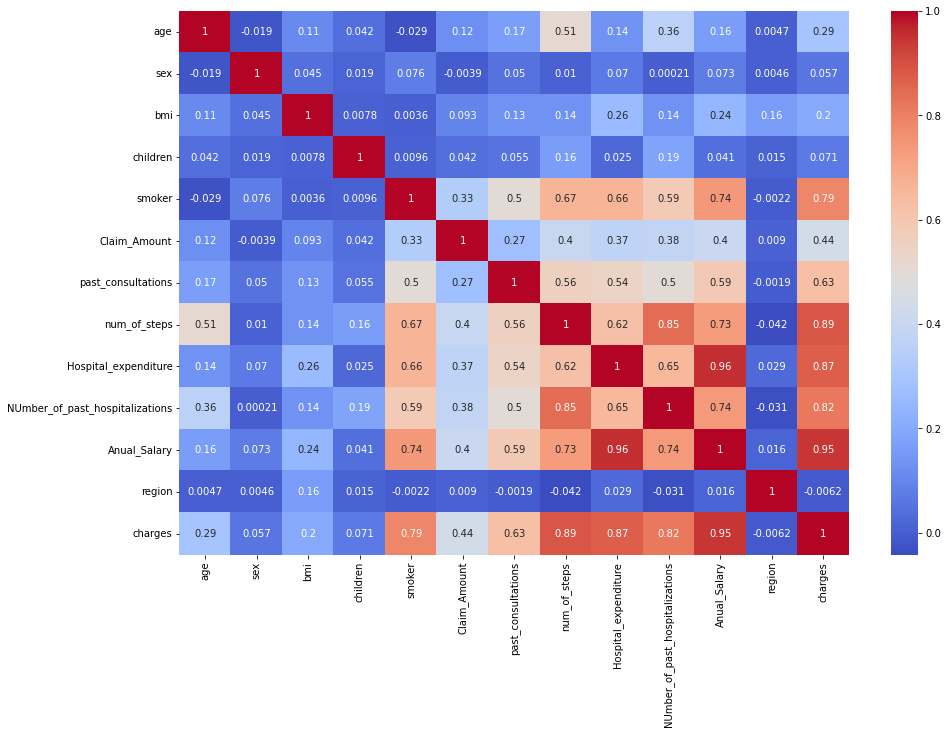

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

# Creating Models

In [37]:
# Splitting for model 1
X1 = insurance.drop(['charges','age','sex','bmi','children','region'],axis=1)
Y = insurance.iloc[:,-1]

# Splitting for model 2
X2 = insurance.drop(['charges'],axis=1)

# Splitting for model 3
X3 = insurance.drop(['charges','age','sex','bmi','children'],axis=1)

In [38]:
random_state = 42

# Training Data for model 1
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y, test_size=0.2, random_state=random_state)

# Training Data for model 2
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2,Y, random_state=random_state)

# Training Data for model 3
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3,Y, test_size=0.3, random_state=random_state)

In [39]:
# Feature Scaling using the Standard Scaler
# We do this when we want to normalize our data (mean = 0 and Std = As close to 0 as possible)
sc = StandardScaler()

# Model 1
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)

Y_train_arr1 = Y_train1.values
Y_train1 = Y_train_arr1.reshape((-1,1))
Y_train1 = sc.fit_transform(Y_train1)

# Model 2
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.fit_transform(X_test2)

Y_train_arr2 = Y_train2.values
Y_train2 = Y_train_arr2.reshape((-1,1))
Y_train2 = sc.fit_transform(Y_train2)

# Model 3
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.fit_transform(X_test3)

Y_train_arr3 = Y_train3.values
Y_train3 = Y_train_arr3.reshape((-1,1))
Y_train3 = sc.fit_transform(Y_train3)

In [40]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1 = model1.fit(X_train1, Y_train1)
model2 = model2.fit(X_train2, Y_train2)
model3 = model3.fit(X_train3, Y_train3)

In [41]:
# Predictions Model 1
prediction1 = model1.predict(X_test1)
prediction1 = sc.inverse_transform(prediction1)

# Predictions Model 2
prediction2 = model2.predict(X_test2)
prediction2 = sc.inverse_transform(prediction2)

# Predictions Model 3
prediction3 = model3.predict(X_test3)
prediction3 = sc.inverse_transform(prediction3)

In [42]:
#r2 and adjusted r2 

#model 1 - test 
model1_r2 = r2_score(Y_test1, prediction1)
model1_adj_r2 = 1 - (1 - model1_r2 )*len(Y_train1)/(len(Y_train1)-X_train1.shape[1]-1)

print("r2 score for model 1 is :{} and its adj_r2 is: {}".format(model1_r2, model1_adj_r2))

#model 2 - test 
model2_r2 = r2_score(Y_test2, prediction2)
model2_adj_r2 = 1 - (1 - model2_r2 )*len(Y_train2)/(len(Y_train2)-X_train2.shape[1]-1)

print("r2 score for model 2 is :{} and its adj_r2 is: {}".format(model2_r2, model2_adj_r2))

#model 3 - test 
model3_r2 = r2_score(Y_test3, prediction3)
model3_adj_r2 = 1 - (1 - model3_r2 )*len(Y_train3)/(len(Y_train3)-X_train3.shape[1]-1)

print("r2 score for model 3 is :{} and its adj_r2 is: {}".format(model3_r2, model3_adj_r2))

r2 score for model 1 is :0.9683293207374748 and its adj_r2 is: 0.9680907468823898
r2 score for model 2 is :0.9735687133633579 and its adj_r2 is: 0.9732216358620687
r2 score for model 3 is :0.9753153904456928 and its adj_r2 is: 0.9750757340422529


In [43]:
#Comparing rmse values for the models 

#rmse for model 1
rmse_model1 = mean_squared_error(Y_test1, prediction1, squared=False)

print("rmse for model 1 is:{}".format(rmse_model1))

#rmse for model 2
rmse_model2 = mean_squared_error(Y_test2, prediction2, squared=False)

print("rmse for model 2 is:{}".format(rmse_model2))

#rmse for model 3
rmse_model3 = mean_squared_error(Y_test3, prediction3, squared=False)

print("rmse for model 3 is:{}".format(rmse_model3))

rmse for model 1 is:2250.127120567546
rmse for model 2 is:2034.883961426509
rmse for model 3 is:1942.6707158970848
